# Introduction to Queryverse.jl

This notebook has all the code required to follow the tutorial by [David Anthoff](https://www.david-anthoff.com/) on 6/14/2018. This notebook _is not_ a self contained introduction to the [Queryverse.jl](https://github.com/davidanthoff/Queryverse.jl), instead it is meant to complement the video tutorial.

## Logistics

![alt](slides/Slide3.PNG)

![alt](slides/Slide4.PNG)

## End-to-end example

In [1]:
using Queryverse, VegaDatasets, IndexedTables

The `dataset` function from the [VegaDatasets.jl](https://github.com/davidanthoff/VegaDatasets.jl) package returns a number of useful example datasets.

In [2]:
cars = dataset("cars")

406x9 Vega dataset
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

__WARNING__: The following cell will not run on juliabox, you need to run it on a local Jupyter instance.

Piping the `cars` dataset into [DataVoyager.jl](https://github.com/davidanthoff/DataVoyager.jl) opens a UI for data exploration and plotting.

In [3]:
cars |> Voyager()

DataVoyager.Voyager(Electron.Window(Electron.Application(0x0000000000000001, Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x000000000000045c) open, 0 bytes waiting), Process(`'C:\Users\david\.julia\v0.6\Electron\src\..\deps\electron\electron.exe' 'C:\Users\david\.julia\v0.6\Electron\src\main.js' juliaelectron-17048-1 juliaelectron-sysnotify-17048-1`, ProcessRunning), Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x0000000000000464) active, 0 bytes waiting), true), 1, true))

The default view shows a plot per column, picking an appropriate style based on the data type of the column.
![alt](screenshots/voyager1.png)

Dragging the quantitative wildcard fields on both the x and y channel shows as correlation plots.
![alt](screenshots/voyager2.png)

We can use [Query.jl](https://github.com/davidanthoff/Query.jl) operators to filter the `cars` dataset.

In [4]:
cars |>
@filter(_.Origin=="USA")

?x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

The file IO features of the Queryverse allow us to save the filtered dataset as a CSV file.

In [5]:
cars |>
@filter(_.Origin=="USA") |>
save("us_cars.csv")

We can also load CSV files from disc, and directly create a plot for that data with [VegaLite.jl](https://github.com/fredo-dedup/VegaLite.jl).

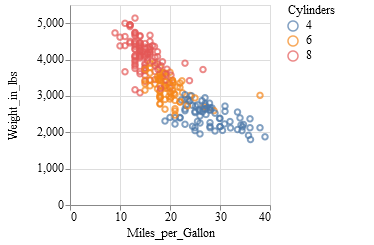

In [6]:
load("us_cars.csv") |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Weight_in_lbs, color="Cylinders:n")

## File IO

Queryverse provides a unified file IO API for a large number of tabular file formats.

![alt](slides/Slide7.PNG)

### Load

![alt](slides/Slide8.PNG)

Load a CSV file:

In [7]:
load("data/cars.csv")

406x9 CSV file
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

Load a feather file:

In [8]:
load("data/cars.feather")

406x9 Feather file
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

Load an Excel file (note how we have to specify the sheet we want to load):

In [9]:
load("data/cars.xlsx", "cars")

406x9 Excel file
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8.0       │ USA    │ 3504.0        │ 307.0       
15.0             │ 8.0       │ USA    │ 3693.0        │ 350.0       
18.0             │ 8.0       │ USA    │ 3436.0        │ 318.0       
16.0             │ 8.0       │ USA    │ 3433.0        │ 304.0       
17.0             │ 8.0       │ USA    │ 3449.0        │ 302.0       
15.0             │ 8.0       │ USA    │ 4341.0        │ 429.0       
14.0             │ 8.0       │ USA    │ 4354.0        │ 454.0       
14.0             │ 8.0       │ USA    │ 4312.0        │ 440.0       
14.0             │ 8.0       │ USA    │ 4425.0        │ 455.0       
15.0             │ 8.0       │ USA    │ 3850.0        │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

We can also specify the exact range in the Excel file we want to load:

In [10]:
load("data/cars.xlsx", "cars!C1:G41")

40x5 Excel file
Origin │ Weight_in_lbs │ Displacement │ Acceleration
───────┼───────────────┼──────────────┼─────────────
USA    │ 3504.0        │ 307.0        │ 12.0        
USA    │ 3693.0        │ 350.0        │ 11.5        
USA    │ 3436.0        │ 318.0        │ 11.0        
USA    │ 3433.0        │ 304.0        │ 12.0        
USA    │ 3449.0        │ 302.0        │ 10.5        
USA    │ 4341.0        │ 429.0        │ 10.0        
USA    │ 4354.0        │ 454.0        │ 9.0         
USA    │ 4312.0        │ 440.0        │ 8.5         
USA    │ 4425.0        │ 455.0        │ 10.0        
USA    │ 3850.0        │ 390.0        │ 8.5         
... with 30 more rows, and 1 more column: Name

We can also load various stats files:

In [11]:
load("data/cars.dta")

406x9 STATA file
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8.0       │ "USA"  │ 3504.0        │ 307.0       
15.0             │ 8.0       │ "USA"  │ 3693.0        │ 350.0       
18.0             │ 8.0       │ "USA"  │ 3436.0        │ 318.0       
16.0             │ 8.0       │ "USA"  │ 3433.0        │ 304.0       
17.0             │ 8.0       │ "USA"  │ 3449.0        │ 302.0       
15.0             │ 8.0       │ "USA"  │ 4341.0        │ 429.0       
14.0             │ 8.0       │ "USA"  │ 4354.0        │ 454.0       
14.0             │ 8.0       │ "USA"  │ 4312.0        │ 440.0       
14.0             │ 8.0       │ "USA"  │ 4425.0        │ 455.0       
15.0             │ 8.0       │ "USA"  │ 3850.0        │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

In [12]:
load("data/cars.sas7bdat")

406x9 SAS file
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8.0       │ "USA"  │ 3504.0        │ 307.0       
15.0             │ 8.0       │ "USA"  │ 3693.0        │ 350.0       
18.0             │ 8.0       │ "USA"  │ 3436.0        │ 318.0       
16.0             │ 8.0       │ "USA"  │ 3433.0        │ 304.0       
17.0             │ 8.0       │ "USA"  │ 3449.0        │ 302.0       
15.0             │ 8.0       │ "USA"  │ 4341.0        │ 429.0       
14.0             │ 8.0       │ "USA"  │ 4354.0        │ 454.0       
14.0             │ 8.0       │ "USA"  │ 4312.0        │ 440.0       
14.0             │ 8.0       │ "USA"  │ 4425.0        │ 455.0       
15.0             │ 8.0       │ "USA"  │ 3850.0        │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

In [13]:
load("data/cars.sav")

406x9 SPSS file
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8.0       │ "USA"  │ 3504.0        │ 307.0       
15.0             │ 8.0       │ "USA"  │ 3693.0        │ 350.0       
18.0             │ 8.0       │ "USA"  │ 3436.0        │ 318.0       
16.0             │ 8.0       │ "USA"  │ 3433.0        │ 304.0       
17.0             │ 8.0       │ "USA"  │ 3449.0        │ 302.0       
15.0             │ 8.0       │ "USA"  │ 4341.0        │ 429.0       
14.0             │ 8.0       │ "USA"  │ 4354.0        │ 454.0       
14.0             │ 8.0       │ "USA"  │ 4312.0        │ 440.0       
14.0             │ 8.0       │ "USA"  │ 4425.0        │ 455.0       
15.0             │ 8.0       │ "USA"  │ 3850.0        │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

### Save

![alt](slides/Slide9.PNG)

Remember, the `cars` variable is a table we previously loaded:

In [14]:
cars

406x9 Vega dataset
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

We can save it as a CSV file with this syntax:

In [15]:
save("cars1.csv", cars)

We can also pipe the data into the `save` function:

In [16]:
cars |> save("cars2.csv")

Depending on the file format, we can specify various options, for example the delimiter character for CSV files:

In [17]:
cars |> save("cars3.csv", delim=';')

We can also save as a feather file:

In [18]:
cars |> save("cars4.feather")

### Combine load and save

We can also load a file in one format and directly pipe it into the `save` function and save it in another format. Note that the data will never be materialized as say a `DataFrame` in that case.

In [19]:
load("data/cars.sas7bdat") |> save("cars5.csv")

## Tables

![alt](slides/Slide11.PNG)

![alt](slides/Slide12.PNG)

![alt](slides/Slide13.PNG)

Note how the load function returns a different type for each kind of file we can load. All of them implement the TableTraits.jl interface.

In [20]:
load("data/cars.csv") |> typeof

CSVFiles.CSVFile

In [21]:
load("data/cars.feather") |> typeof

FeatherFiles.FeatherFile

In [22]:
dataset("cars") |> typeof

VegaDatasets.VegaDataset

The constructors of most table types accept any table, and will automatically convert the table at construction. For example, the following code loads a feather file. The call to `load` returns a `FeatherFile` instance, which implements the TableTraits.jl interface. When we pass that to the `DataFrame` constructor, it automatically constructs a `DataFrame` from the data in the file.

In [23]:
DataFrame(load("data/cars.feather"))

406×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement │
├─────┼──────────────────┼───────────┼────────┼───────────────┼──────────────┤
│ 1   │ 18.0             │ 8         │ USA    │ 3504          │ 307.0        │
│ 2   │ 15.0             │ 8         │ USA    │ 3693          │ 350.0        │
│ 3   │ 18.0             │ 8         │ USA    │ 3436          │ 318.0        │
│ 4   │ 16.0             │ 8         │ USA    │ 3433          │ 304.0        │
│ 5   │ 17.0             │ 8         │ USA    │ 3449          │ 302.0        │
│ 6   │ 15.0             │ 8         │ USA    │ 4341          │ 429.0        │
│ 7   │ 14.0             │ 8         │ USA    │ 4354          │ 454.0        │
│ 8   │ 14.0             │ 8         │ USA    │ 4312          │ 440.0        │
│ 9   │ 14.0             │ 8         │ USA    │ 4425          │ 455.0        │
│ 10  │ 15.0             │ 8         │ USA    │ 3850          │ 390.0        │
│ 11  │ missing          │ 4         │ Europe │ 3090          │ 133.0        │
⋮
│ 395 │ 25.0             │ 6         │ USA    │ 2945          │ 181.0        │
│ 396 │ 38.0             │ 6         │ USA    │ 3015          │ 262.0        │
│ 397 │ 26.0             │ 4         │ USA    │ 2585          │ 156.0        │
│ 398 │ 22.0             │ 6         │ USA    │ 2835          │ 232.0        │
│ 399 │ 32.0             │ 4         │ Japan  │ 2665          │ 144.0        │
│ 400 │ 36.0             │ 4         │ USA    │ 2370          │ 135.0        │
│ 401 │ 27.0             │ 4         │ USA    │ 2950          │ 151.0        │
│ 402 │ 27.0             │ 4         │ USA    │ 2790          │ 140.0        │
│ 403 │ 44.0             │ 4         │ Europe │ 2130          │ 97.0         │
│ 404 │ 32.0             │ 4         │ USA    │ 2295          │ 135.0        │
│ 405 │ 28.0             │ 4         │ USA    │ 2625          │ 120.0        │
│ 406 │ 31.0             │ 4         │ USA    │ 2720          │ 119.0        │

We can also pipe things into a `DataFrame`:

In [24]:
load("data/cars.feather") |> DataFrame

406×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement │
├─────┼──────────────────┼───────────┼────────┼───────────────┼──────────────┤
│ 1   │ 18.0             │ 8         │ USA    │ 3504          │ 307.0        │
│ 2   │ 15.0             │ 8         │ USA    │ 3693          │ 350.0        │
│ 3   │ 18.0             │ 8         │ USA    │ 3436          │ 318.0        │
│ 4   │ 16.0             │ 8         │ USA    │ 3433          │ 304.0        │
│ 5   │ 17.0             │ 8         │ USA    │ 3449          │ 302.0        │
│ 6   │ 15.0             │ 8         │ USA    │ 4341          │ 429.0        │
│ 7   │ 14.0             │ 8         │ USA    │ 4354          │ 454.0        │
│ 8   │ 14.0             │ 8         │ USA    │ 4312          │ 440.0        │
│ 9   │ 14.0             │ 8         │ USA    │ 4425          │ 455.0        │
│ 10  │ 15.0             │ 8         │ USA    │ 3850          │ 390.0        │
│ 11  │ missing          │ 4         │ Europe │ 3090          │ 133.0        │
⋮
│ 395 │ 25.0             │ 6         │ USA    │ 2945          │ 181.0        │
│ 396 │ 38.0             │ 6         │ USA    │ 3015          │ 262.0        │
│ 397 │ 26.0             │ 4         │ USA    │ 2585          │ 156.0        │
│ 398 │ 22.0             │ 6         │ USA    │ 2835          │ 232.0        │
│ 399 │ 32.0             │ 4         │ Japan  │ 2665          │ 144.0        │
│ 400 │ 36.0             │ 4         │ USA    │ 2370          │ 135.0        │
│ 401 │ 27.0             │ 4         │ USA    │ 2950          │ 151.0        │
│ 402 │ 27.0             │ 4         │ USA    │ 2790          │ 140.0        │
│ 403 │ 44.0             │ 4         │ Europe │ 2130          │ 97.0         │
│ 404 │ 32.0             │ 4         │ USA    │ 2295          │ 135.0        │
│ 405 │ 28.0             │ 4         │ USA    │ 2625          │ 120.0        │
│ 406 │ 31.0             │ 4         │ USA    │ 2720          │ 119.0        │

We can also pipe things into an `IndexedTable`:

In [25]:
load("data/cars.feather") |> table

Table with 406 rows, 9 columns:
Columns:
#  colname           type
──────────────────────────────────────────────────
1  Miles_per_Gallon  DataValues.DataValue{Float64}
2  Cylinders         Int64
3  Origin            String
4  Weight_in_lbs     Int64
5  Displacement      Float64
6  Acceleration      Float64
7  Name              String
8  Year              String
9  Horsepower        DataValues.DataValue{Int64}

Because both `DataFrame` and `IndexedTable` implement the TableTraits.jl interface, we can also do silly things like 1) load a feather file, 2) convert it into an `IndexedTable`, then 3) convert that `IndexedTable` into a `DataFrame`.

In [26]:
load("data/cars.feather") |> table |> DataFrame

406×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement │
├─────┼──────────────────┼───────────┼────────┼───────────────┼──────────────┤
│ 1   │ 18.0             │ 8         │ USA    │ 3504          │ 307.0        │
│ 2   │ 15.0             │ 8         │ USA    │ 3693          │ 350.0        │
│ 3   │ 18.0             │ 8         │ USA    │ 3436          │ 318.0        │
│ 4   │ 16.0             │ 8         │ USA    │ 3433          │ 304.0        │
│ 5   │ 17.0             │ 8         │ USA    │ 3449          │ 302.0        │
│ 6   │ 15.0             │ 8         │ USA    │ 4341          │ 429.0        │
│ 7   │ 14.0             │ 8         │ USA    │ 4354          │ 454.0        │
│ 8   │ 14.0             │ 8         │ USA    │ 4312          │ 440.0        │
│ 9   │ 14.0             │ 8         │ USA    │ 4425          │ 455.0        │
│ 10  │ 15.0             │ 8         │ USA    │ 3850          │ 390.0        │
│ 11  │ missing          │ 4         │ Europe │ 3090          │ 133.0        │
⋮
│ 395 │ 25.0             │ 6         │ USA    │ 2945          │ 181.0        │
│ 396 │ 38.0             │ 6         │ USA    │ 3015          │ 262.0        │
│ 397 │ 26.0             │ 4         │ USA    │ 2585          │ 156.0        │
│ 398 │ 22.0             │ 6         │ USA    │ 2835          │ 232.0        │
│ 399 │ 32.0             │ 4         │ Japan  │ 2665          │ 144.0        │
│ 400 │ 36.0             │ 4         │ USA    │ 2370          │ 135.0        │
│ 401 │ 27.0             │ 4         │ USA    │ 2950          │ 151.0        │
│ 402 │ 27.0             │ 4         │ USA    │ 2790          │ 140.0        │
│ 403 │ 44.0             │ 4         │ Europe │ 2130          │ 97.0         │
│ 404 │ 32.0             │ 4         │ USA    │ 2295          │ 135.0        │
│ 405 │ 28.0             │ 4         │ USA    │ 2625          │ 120.0        │
│ 406 │ 31.0             │ 4         │ USA    │ 2720          │ 119.0        │

It works the other way around as well:

In [27]:
load("data/cars.feather") |> DataFrame |> table

Table with 406 rows, 9 columns:
Columns:
#  colname           type
──────────────────────────────────────────────────
1  Miles_per_Gallon  DataValues.DataValue{Float64}
2  Cylinders         Int64
3  Origin            String
4  Weight_in_lbs     Int64
5  Displacement      Float64
6  Acceleration      Float64
7  Name              String
8  Year              String
9  Horsepower        DataValues.DataValue{Int64}

Because [VegaLite.jl](https://github.com/fredo-dedup/VegaLite.jl) accepts data as any TableTraits.jl table, we can plot `DataFrame`s:

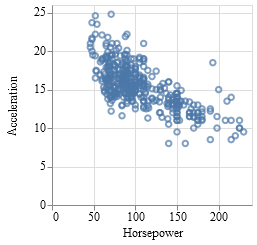

In [28]:
load("data/cars.feather") |> DataFrame |> @vlplot(:point, x=:Horsepower, y=:Acceleration)

Or we can plot `IndexedTable`s

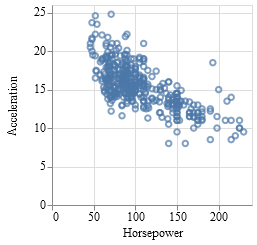

In [29]:
load("data/cars.feather") |> table |> @vlplot(:point, x=:Horsepower, y=:Acceleration)

Or we can skip the table types entirely and directly plot the file:

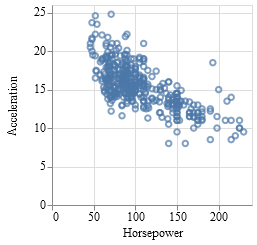

In [30]:
load("data/cars.feather") |> @vlplot(:point, x=:Horsepower, y=:Acceleration)

We can also do lots of other combinations. Here we load a stats file into an `IndexedTable`:

In [31]:
it = load("data/cars.sas7bdat") |> table

Table with 406 rows, 9 columns:
Columns:
#  colname           type
──────────────────────────────────────────────────
1  Miles_per_Gallon  DataValues.DataValue{Float64}
2  Cylinders         DataValues.DataValue{Float64}
3  Origin            DataValues.DataValue{String}
4  Weight_in_lbs     DataValues.DataValue{Float64}
5  Displacement      DataValues.DataValue{Float64}
6  Acceleration      DataValues.DataValue{Float64}
7  Name              DataValues.DataValue{String}
8  Year              DataValues.DataValue{String}
9  Horsepower        DataValues.DataValue{Float64}

Then we convert it into a `DataFrame`:

In [32]:
df = it |> DataFrame

406×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement │
├─────┼──────────────────┼───────────┼────────┼───────────────┼──────────────┤
│ 1   │ 18.0             │ 8.0       │ USA    │ 3504.0        │ 307.0        │
│ 2   │ 15.0             │ 8.0       │ USA    │ 3693.0        │ 350.0        │
│ 3   │ 18.0             │ 8.0       │ USA    │ 3436.0        │ 318.0        │
│ 4   │ 16.0             │ 8.0       │ USA    │ 3433.0        │ 304.0        │
│ 5   │ 17.0             │ 8.0       │ USA    │ 3449.0        │ 302.0        │
│ 6   │ 15.0             │ 8.0       │ USA    │ 4341.0        │ 429.0        │
│ 7   │ 14.0             │ 8.0       │ USA    │ 4354.0        │ 454.0        │
│ 8   │ 14.0             │ 8.0       │ USA    │ 4312.0        │ 440.0        │
│ 9   │ 14.0             │ 8.0       │ USA    │ 4425.0        │ 455.0        │
│ 10  │ 15.0             │ 8.0       │ USA    │ 3850.0        │ 390.0        │
│ 11  │ missing          │ 4.0       │ Europe │ 3090.0        │ 133.0        │
⋮
│ 395 │ 25.0             │ 6.0       │ USA    │ 2945.0        │ 181.0        │
│ 396 │ 38.0             │ 6.0       │ USA    │ 3015.0        │ 262.0        │
│ 397 │ 26.0             │ 4.0       │ USA    │ 2585.0        │ 156.0        │
│ 398 │ 22.0             │ 6.0       │ USA    │ 2835.0        │ 232.0        │
│ 399 │ 32.0             │ 4.0       │ Japan  │ 2665.0        │ 144.0        │
│ 400 │ 36.0             │ 4.0       │ USA    │ 2370.0        │ 135.0        │
│ 401 │ 27.0             │ 4.0       │ USA    │ 2950.0        │ 151.0        │
│ 402 │ 27.0             │ 4.0       │ USA    │ 2790.0        │ 140.0        │
│ 403 │ 44.0             │ 4.0       │ Europe │ 2130.0        │ 97.0         │
│ 404 │ 32.0             │ 4.0       │ USA    │ 2295.0        │ 135.0        │
│ 405 │ 28.0             │ 4.0       │ USA    │ 2625.0        │ 120.0        │
│ 406 │ 31.0             │ 4.0       │ USA    │ 2720.0        │ 119.0        │

We can pipe the `IndexedTable` into Voyager:

In [33]:
it |> Voyager()

DataVoyager.Voyager(Electron.Window(Electron.Application(0x0000000000000001, Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x000000000000045c) open, 0 bytes waiting), Process(`'C:\Users\david\.julia\v0.6\Electron\src\..\deps\electron\electron.exe' 'C:\Users\david\.julia\v0.6\Electron\src\main.js' juliaelectron-17048-1 juliaelectron-sysnotify-17048-1`, ProcessRunning), Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x0000000000000464) active, 0 bytes waiting), true), 2, true))

Or we can pipe the `DataFrame` into Voyager:

In [34]:
df |> Voyager()

DataVoyager.Voyager(Electron.Window(Electron.Application(0x0000000000000001, Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x000000000000045c) open, 0 bytes waiting), Process(`'C:\Users\david\.julia\v0.6\Electron\src\..\deps\electron\electron.exe' 'C:\Users\david\.julia\v0.6\Electron\src\main.js' juliaelectron-17048-1 juliaelectron-sysnotify-17048-1`, ProcessRunning), Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x0000000000000464) active, 0 bytes waiting), true), 3, true))

All the file IO functions work with anything that implements the TableTraits.jl interface, so we can e.g. save both an `IndexedTable` and a `DataFrame` as a feather file:

In [35]:
it |> save("cars8.feather")

In [36]:
df |> save("cars9.feather")

![alt](slides/Slide14.PNG)

## The pipe

![alt](slides/Slide16.PNG)

We can pipe in one line:

In [37]:
load("data/cars.csv") |> @filter(_.Origin=="Europe") |> DataFrame

73×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement │
├─────┼──────────────────┼───────────┼────────┼───────────────┼──────────────┤
│ 1   │ missing          │ 4         │ Europe │ 3090          │ 133.0        │
│ 2   │ 26.0             │ 4         │ Europe │ 1835          │ 97.0         │
│ 3   │ 25.0             │ 4         │ Europe │ 2672          │ 110.0        │
│ 4   │ 24.0             │ 4         │ Europe │ 2430          │ 107.0        │
│ 5   │ 25.0             │ 4         │ Europe │ 2375          │ 104.0        │
│ 6   │ 26.0             │ 4         │ Europe │ 2234          │ 121.0        │
│ 7   │ missing          │ 4         │ Europe │ 1978          │ 97.0         │
│ 8   │ 28.0             │ 4         │ Europe │ 2123          │ 116.0        │
│ 9   │ 30.0             │ 4         │ Europe │ 2074          │ 79.0         │
│ 10  │ 30.0             │ 4         │ Europe │ 2065          │ 88.0         │
│ 11  │ 27.0             │ 4         │ Europe │ 1834          │ 97.0         │
⋮
│ 62  │ 36.4             │ 5         │ Europe │ 2950          │ 121.0        │
│ 63  │ 30.0             │ 4         │ Europe │ 3250          │ 146.0        │
│ 64  │ 40.9             │ 4         │ Europe │ 1835          │ 85.0         │
│ 65  │ 29.8             │ 4         │ Europe │ 1845          │ 89.0         │
│ 66  │ 35.0             │ 4         │ Europe │ 2500          │ 122.0        │
│ 67  │ 33.0             │ 4         │ Europe │ 2190          │ 105.0        │
│ 68  │ 34.5             │ 4         │ Europe │ 2320          │ 100.0        │
│ 69  │ 28.1             │ 4         │ Europe │ 3230          │ 141.0        │
│ 70  │ missing          │ 4         │ Europe │ 2800          │ 121.0        │
│ 71  │ 30.7             │ 6         │ Europe │ 3160          │ 145.0        │
│ 72  │ 36.0             │ 4         │ Europe │ 1980          │ 105.0        │
│ 73  │ 44.0             │ 4         │ Europe │ 2130          │ 97.0         │

Or we can write each step on its own line:

In [38]:
load("data/cars.csv") |>
    @filter(_.Origin=="Europe") |>
    DataFrame

73×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement │
├─────┼──────────────────┼───────────┼────────┼───────────────┼──────────────┤
│ 1   │ missing          │ 4         │ Europe │ 3090          │ 133.0        │
│ 2   │ 26.0             │ 4         │ Europe │ 1835          │ 97.0         │
│ 3   │ 25.0             │ 4         │ Europe │ 2672          │ 110.0        │
│ 4   │ 24.0             │ 4         │ Europe │ 2430          │ 107.0        │
│ 5   │ 25.0             │ 4         │ Europe │ 2375          │ 104.0        │
│ 6   │ 26.0             │ 4         │ Europe │ 2234          │ 121.0        │
│ 7   │ missing          │ 4         │ Europe │ 1978          │ 97.0         │
│ 8   │ 28.0             │ 4         │ Europe │ 2123          │ 116.0        │
│ 9   │ 30.0             │ 4         │ Europe │ 2074          │ 79.0         │
│ 10  │ 30.0             │ 4         │ Europe │ 2065          │ 88.0         │
│ 11  │ 27.0             │ 4         │ Europe │ 1834          │ 97.0         │
⋮
│ 62  │ 36.4             │ 5         │ Europe │ 2950          │ 121.0        │
│ 63  │ 30.0             │ 4         │ Europe │ 3250          │ 146.0        │
│ 64  │ 40.9             │ 4         │ Europe │ 1835          │ 85.0         │
│ 65  │ 29.8             │ 4         │ Europe │ 1845          │ 89.0         │
│ 66  │ 35.0             │ 4         │ Europe │ 2500          │ 122.0        │
│ 67  │ 33.0             │ 4         │ Europe │ 2190          │ 105.0        │
│ 68  │ 34.5             │ 4         │ Europe │ 2320          │ 100.0        │
│ 69  │ 28.1             │ 4         │ Europe │ 3230          │ 141.0        │
│ 70  │ missing          │ 4         │ Europe │ 2800          │ 121.0        │
│ 71  │ 30.7             │ 6         │ Europe │ 3160          │ 145.0        │
│ 72  │ 36.0             │ 4         │ Europe │ 1980          │ 105.0        │
│ 73  │ 44.0             │ 4         │ Europe │ 2130          │ 97.0         │

The following example doesn't return anything at the end because the `save` function has no return value:

In [39]:
load("data/cars.csv") |>
    @filter(_.Origin=="Europe") |>
    save("cars10.csv")

![alt](slides/Slide17.PNG)

But sometimes we want to continue the pipe, for example to display the table at the interactive prompt:

In [40]:
load("data/cars.csv") |>
    @filter(_.Origin=="Europe") |>
    @tee(save("cars10.csv"))

?x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
#NA              │ 4         │ Europe │ 3090          │ 133.0       
26.0             │ 4         │ Europe │ 1835          │ 97.0        
25.0             │ 4         │ Europe │ 2672          │ 110.0       
24.0             │ 4         │ Europe │ 2430          │ 107.0       
25.0             │ 4         │ Europe │ 2375          │ 104.0       
26.0             │ 4         │ Europe │ 2234          │ 121.0       
#NA              │ 4         │ Europe │ 1978          │ 97.0        
28.0             │ 4         │ Europe │ 2123          │ 116.0       
30.0             │ 4         │ Europe │ 2074          │ 79.0        
30.0             │ 4         │ Europe │ 2065          │ 88.0        
... with more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

Or to save the data as a CSV File and then create a plot:

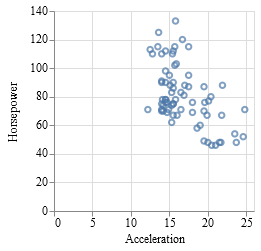

In [41]:
load("data/cars.csv") |>
    @filter(_.Origin=="Europe") |>
    @tee(save("cars10.csv")) |>
    @vlplot(:point, x=:Acceleration, y=:Horsepower)

We can also pipe the plot to the `save` function, i.e. it is not just for tabular data!

In [42]:
load("data/cars.csv") |>
    @filter(_.Origin=="Europe") |>
    @tee(save("cars10.csv")) |>
    @vlplot(:point, x=:Acceleration, y=:Horsepower) |>
    save("fig1.png")

If we want to save the plot in multiple formats and see it at the end, we can use repeated `@tee` calls:

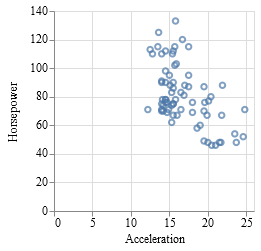

In [43]:
load("data/cars.csv") |>
    @filter(_.Origin=="Europe") |>
    @tee(save("cars10.csv")) |>
    @vlplot(:point, x=:Acceleration, y=:Horsepower) |>
    @tee(save("fig1.png")) |>
    @tee(save("fig1.pdf"))

## Queries

### Basics

![alt](slides/Slide19.PNG)

In [44]:
load("data/cars.feather") |> @filter(_.Origin=="Europe") |> @orderby(_.Horsepower)

?x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
26.0             │ 4         │ Europe │ 1835          │ 97.0        
26.0             │ 4         │ Europe │ 1950          │ 97.0        
#NA              │ 4         │ Europe │ 1978          │ 97.0        
43.1             │ 4         │ Europe │ 1985          │ 90.0        
44.3             │ 4         │ Europe │ 2085          │ 90.0        
43.4             │ 4         │ Europe │ 2335          │ 90.0        
29.0             │ 4         │ Europe │ 1867          │ 68.0        
44.0             │ 4         │ Europe │ 2130          │ 97.0        
23.0             │ 4         │ Europe │ 2254          │ 97.0        
36.0             │ 4         │ Europe │ 1825          │ 79.0        
... with more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

Queries are not restricted to tabular data.

![alt](slides/Slide20.PNG)

In [45]:
1:8 |> @filter(_%2==0) |> @orderby_descending(_)

?-element query result
 8
 6
 4
 2

If we pipe things into `collect` at the end, we generate an array:

In [46]:
1:8 |> @filter(_%2==0) |> @orderby_descending(_) |> collect

4-element Array{Int64,1}:
 8
 6
 4
 2

We can also start from a `Dict`:

In [47]:
Dict(:a=>4, :b=>2, :c=>8)

Dict{Symbol,Int64} with 3 entries:
  :a => 4
  :b => 2
  :c => 8

And filter the `Dict`:

In [48]:
Dict(:a=>4, :b=>2, :c=>8) |> @filter(_[2]>3)

?-element query result
 :a=>4
 :c=>8

And collect the pairs into an array:

In [49]:
Dict(:a=>4, :b=>2, :c=>8) |> @filter(_[2]>3) |> collect

2-element Array{Pair{Symbol,Int64},1}:
 :a=>4
 :c=>8

Or we can collec them into another `Dict`. Not that this will only work if the pipe generates a stream of `Pair`s:

In [50]:
Dict(:a=>4, :b=>2, :c=>8) |> @filter(_[2]>3) |> Dict

Dict{Symbol,Int64} with 2 entries:
  :a => 4
  :c => 8

We can also start from a generator:

In [51]:
(i=>i^2 for i in 1:10) |> @filter(_[2]>3) |> @orderby(_[1]) |> collect

9-element Array{Pair{Int64,Int64},1}:
 2=>4   
 3=>9   
 4=>16  
 5=>25  
 6=>36  
 7=>49  
 8=>64  
 9=>81  
 10=>100

### @filter

`@filter` removes elements from the input stream based on some condition.

In [52]:
1:10 |> @filter(_>5)

?-element query result
 6
 7
 8
 9
 10

![alt](slides/Slide21.PNG)

You don't have to use the anonymous function shorthand, you can also use normal anonymous functions (but why would you, more typing!):

In [53]:
1:10 |> @filter(i -> i>5)

?-element query result
 6
 7
 8
 9
 10

### @map

`@map` applies a transformation function to each element from the input stream. Here we square every element:

In [54]:
1:10 |> @map(_^2)

10-element query result
 1
 4
 9
 16
 25
 36
 49
 64
 81
 100

Here we create a `Pair` for each input element, so that we can pipe things into a `Dict`:

In [55]:
1:10 |> @map(_=>_^2) |> Dict

Dict{Int64,Int64} with 10 entries:
  7  => 49
  4  => 16
  9  => 81
  10 => 100
  2  => 4
  3  => 9
  5  => 25
  8  => 64
  6  => 36
  1  => 1

Here we extract the `Origin` column for the `cars` table:

In [56]:
cars |> @map(_.Origin)

406-element query result
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
... with 396 more elements

#### Brief detour about named tuples

First, lets store the stream of named tuples in an array:

In [58]:
r = cars |> collect

406-element Array{NamedTuples._NT_Miles__per__Gallon_Cylinders_Origin_Weight__in__lbs_Displacement_Acceleration_Name_Year_Horsepower{DataValues.DataValue{Float64},Int64,String,Int64,Float64,Float64,String,String,DataValues.DataValue{Int64}},1}:
 (Miles_per_Gallon = 18.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3504, Displacement = 307.0, Acceleration = 12.0, Name = "chevrolet chevelle malibu", Year = "1970-01-01", Horsepower = 130)       
 (Miles_per_Gallon = 15.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3693, Displacement = 350.0, Acceleration = 11.5, Name = "buick skylark 320", Year = "1970-01-01", Horsepower = 165)               
 (Miles_per_Gallon = 18.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3436, Displacement = 318.0, Acceleration = 11.0, Name = "plymouth satellite", Year = "1970-01-01", Horsepower = 150)              
 (Miles_per_Gallon = 16.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3433, Displacement = 304.0, Acceleration = 12.0, Name = "amc rebel

We then access the first named tuple from that array:

In [59]:
nt = r[1]

(Miles_per_Gallon = DataValue{Float64}(18.0), Cylinders = 8, Origin = "USA", Weight_in_lbs = 3504, Displacement = 307.0, Acceleration = 12.0, Name = "chevrolet chevelle malibu", Year = "1970-01-01", Horsepower = DataValue{Int64}(130))

And look at the type:

In [60]:
typeof(nt)

NamedTuples._NT_Miles__per__Gallon_Cylinders_Origin_Weight__in__lbs_Displacement_Acceleration_Name_Year_Horsepower{DataValues.DataValue{Float64},Int64,String,Int64,Float64,Float64,String,String,DataValues.DataValue{Int64}}

We can use the `fieldnames` function to inquire about the names of the fields of the named tuple:

In [61]:
fieldnames(nt)

9-element Array{Symbol,1}:
 :Miles_per_Gallon
 :Cylinders       
 :Origin          
 :Weight_in_lbs   
 :Displacement    
 :Acceleration    
 :Name            
 :Year            
 :Horsepower      

We can access a field with the `.` notation:

In [62]:
nt.Origin

"USA"

Or by indexing, the way we would index into a normal tuple:

In [63]:
nt[3]

"USA"

So the example from above extracts the `Origin` field for each row it gets, at which point we have a stream of `String`s.

In [64]:
cars |> @map(_.Origin)

406-element query result
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
... with 396 more elements

![alt](slides/Slide22.PNG)

We can construct named tuples with the `{}` syntax. Note that this only works within Query.jl macros. Whenever we create named tuples in a `@map`, we are creating a table, because a table is a stream of named tuples:

In [66]:
1:10 |> @map({foo=_, bar=_^2})

10x2 query result
foo │ bar
────┼────
1   │ 1  
2   │ 4  
3   │ 9  
4   │ 16 
5   │ 25 
6   │ 36 
7   │ 49 
8   │ 64 
9   │ 81 
10  │ 100

Lets remember the columns of the `cars` dataset:

In [68]:
cars

406x9 Vega dataset
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

We can extract only two columns:

In [69]:
cars |> @map({_.Name, _.Year})

406x2 query result
Name                      │ Year      
──────────────────────────┼───────────
chevrolet chevelle malibu │ 1970-01-01
buick skylark 320         │ 1970-01-01
plymouth satellite        │ 1970-01-01
amc rebel sst             │ 1970-01-01
ford torino               │ 1970-01-01
ford galaxie 500          │ 1970-01-01
chevrolet impala          │ 1970-01-01
plymouth fury iii         │ 1970-01-01
pontiac catalina          │ 1970-01-01
amc ambassador dpl        │ 1970-01-01
... with 396 more rows

We can extract two columns and rename one:

In [70]:
cars |> @map({_.Name, Foo=_.Year})

406x2 query result
Name                      │ Foo       
──────────────────────────┼───────────
chevrolet chevelle malibu │ 1970-01-01
buick skylark 320         │ 1970-01-01
plymouth satellite        │ 1970-01-01
amc rebel sst             │ 1970-01-01
ford torino               │ 1970-01-01
ford galaxie 500          │ 1970-01-01
chevrolet impala          │ 1970-01-01
plymouth fury iii         │ 1970-01-01
pontiac catalina          │ 1970-01-01
amc ambassador dpl        │ 1970-01-01
... with 396 more rows

Because we are producing a table with the `@map` command, we can save things as a CSV file:

In [72]:
cars |> @map({_.Name, Foo=_.Year}) |> save("cars11.csv")

We can also construct `Pair`s from a table and then store things as a `Dict`:

In [73]:
cars |> @map(_.Name => Date(_.Year)) |> Dict

Dict{String,Date} with 311 entries:
  "chevrolet citation"        => 1982-01-01
  "plymouth 'cuda 340"        => 1970-01-01
  "ford mustang boss 302"     => 1970-01-01
  "ford mustang gl"           => 1982-01-01
  "amc matador"               => 1976-01-01
  "ford granada"              => 1977-01-01
  "amc concord dl"            => 1982-01-01
  "ford gran torino"          => 1976-01-01
  "plymouth arrow gs"         => 1977-01-01
  "chevrolet monte carlo"     => 1970-01-01
  "buick estate wagon (sw)"   => 1979-01-01
  "datsun 510"                => 1978-01-01
  "mercedes benz 300d"        => 1979-01-01
  "bmw 2002"                  => 1970-01-01
  "buick century luxus (sw)"  => 1974-01-01
  "peugeot 604sl"             => 1978-01-01
  "dodge colt"                => 1980-01-01
  "mercedes-benz 240d"        => 1980-01-01
  "audi 4000"                 => 1980-01-01
  "plymouth custom suburb"    => 1973-01-01
  "datsun 310 gx"             => 1982-01-01
  "amc gremlin"               => 1975-01

### @take and @drop

`@drop(n)` drops the first `n` elements from the input stream:

In [74]:
1:10 |> @drop(3)

7-element query result
 4
 5
 6
 7
 8
 9
 10

`@take(n)` takes the first `n` elements from the input stream:

In [75]:
1:10 |> @drop(3) |> @take(4)

4-element query result
 4
 5
 6
 7

That of course also works with tables. To view only row 4-7 we can do:

In [76]:
cars |> @drop(3) |> @take(4)

4x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
... with 4 more columns: Acceleration, Name, Year, Horsepower

### Sorting

The `@orderby` operators accepts an anonymous function that extracts a key for each input element. The elements are then sorted by that key. For example, to sort the `cars` dataset by the `Origin` column, we can write this code:

In [77]:
cars |> @orderby(_.Origin)

406x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
#NA              │ 4         │ Europe │ 3090          │ 133.0       
26.0             │ 4         │ Europe │ 1835          │ 97.0        
25.0             │ 4         │ Europe │ 2672          │ 110.0       
24.0             │ 4         │ Europe │ 2430          │ 107.0       
25.0             │ 4         │ Europe │ 2375          │ 104.0       
26.0             │ 4         │ Europe │ 2234          │ 121.0       
#NA              │ 4         │ Europe │ 1978          │ 97.0        
28.0             │ 4         │ Europe │ 2123          │ 116.0       
30.0             │ 4         │ Europe │ 2074          │ 79.0        
30.0             │ 4         │ Europe │ 2065          │ 88.0        
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

We can also sort in descending order:

In [79]:
cars |> @orderby_descending(_.Origin)

406x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

There are lots of rows that have the same value for `Origin`. We can use the `@thenby` command to specify a secondary sort key:

In [80]:
cars |> @orderby(_.Origin) |> @thenby(_.Year)

?x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
#NA              │ 4         │ Europe │ 3090          │ 133.0       
26.0             │ 4         │ Europe │ 1835          │ 97.0        
25.0             │ 4         │ Europe │ 2672          │ 110.0       
24.0             │ 4         │ Europe │ 2430          │ 107.0       
25.0             │ 4         │ Europe │ 2375          │ 104.0       
26.0             │ 4         │ Europe │ 2234          │ 121.0       
#NA              │ 4         │ Europe │ 1978          │ 97.0        
28.0             │ 4         │ Europe │ 2123          │ 116.0       
30.0             │ 4         │ Europe │ 2074          │ 79.0        
30.0             │ 4         │ Europe │ 2065          │ 88.0        
... with more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

You can chain as many `@thenby` operators as you want:

In [81]:
cars |> @orderby(_.Origin) |> @thenby(_.Year) |> @thenby_descending(_.Horsepower)

?x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
#NA              │ 4         │ Europe │ 3090          │ 133.0       
26.0             │ 4         │ Europe │ 2234          │ 121.0       
25.0             │ 4         │ Europe │ 2375          │ 104.0       
24.0             │ 4         │ Europe │ 2430          │ 107.0       
25.0             │ 4         │ Europe │ 2672          │ 110.0       
26.0             │ 4         │ Europe │ 1835          │ 97.0        
28.0             │ 4         │ Europe │ 2123          │ 116.0       
30.0             │ 4         │ Europe │ 2065          │ 88.0        
30.0             │ 4         │ Europe │ 2074          │ 79.0        
27.0             │ 4         │ Europe │ 1834          │ 97.0        
... with more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

The key extraction function is not restricted to just returning a value, it can also call arbitrary julia functions. For example, here we sort the `cars` dataset by the character length of the `Origin` column:

In [83]:
cars |> @orderby(length(_.Origin))

406x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

### @groupby

![alt](slides/Slide23.PNG)

Here we group by the `Origin` column:

In [84]:
cars |> @groupby(_.Origin)

?-element query result
 NamedTuples._NT_Miles__per__Gallon_Cylinders_Origin_Weight__in__lbs_Displacement_Acceleration_Name_Year_Horsepower{DataValues.DataValue{Float64},Int64,String,Int64,Float64,Float64,String,String,DataValues.DataValue{Int64}}[(Miles_per_Gallon = 18.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3504, Displacement = 307.0, Acceleration = 12.0, Name = "chevrolet chevelle malibu", Year = "1970-01-01", Horsepower = 130), (Miles_per_Gallon = 15.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3693, Displacement = 350.0, Acceleration = 11.5, Name = "buick skylark 320", Year = "1970-01-01", Horsepower = 165), (Miles_per_Gallon = 18.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3436, Displacement = 318.0, Acceleration = 11.0, Name = "plymouth satellite", Year = "1970-01-01", Horsepower = 150), (Miles_per_Gallon = 16.0, Cylinders = 8, Origin = "USA", Weight_in_lbs = 3433, Displacement = 304.0, Acceleration = 12.0, Name = "amc rebel sst", Year = "1970-01-01", Horsepo

We can look at the keys of each group:

In [85]:
cars |> @groupby(_.Origin) |> @map(_.key)

?-element query result
 "USA"
 "Europe"
 "Japan"

We can also look at how many elements there are in each group:

In [86]:
cars |> @groupby(_.Origin) |> @map(length(_))

?-element query result
 254
 73
 79

We can also extract e.g. the third element for each group:

In [87]:
cars |> @groupby(_.Origin) |> @map(_[3])

3x9 query result
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3436          │ 318.0       
25.0             │ 4         │ Europe │ 2672          │ 110.0       
27.0             │ 4         │ Japan  │ 2130          │ 97.0        
... with 4 more columns: Acceleration, Name, Year, Horsepower

In the next example we are creating a table that shows us how many elements we have in each group as a table:

In [88]:
cars |> @groupby(_.Origin) |> @map({Origin=_.key, Count=length(_)})

3x2 query result
Origin │ Count
───────┼──────
USA    │ 254  
Europe │ 73   
Japan  │ 79

![alt](slides/Slide24.PNG)

The anonymous function that returns the group key can call any julia function. For example, we can group things by the length of the `Origin` column:

In [89]:
cars |> @groupby(length(_.Origin)) |> @map({OriginLength=_.key, Count=length(_)})

3x2 query result
OriginLength │ Count
─────────────┼──────
3            │ 254  
6            │ 73   
5            │ 79

![alt](slides/Slide25.PNG)

We can also supply a second anonymous function that gets applied to each element from the source before that element gets placed into a group. This can be helpful if we want to take e.g. the mean for each group:

In [90]:
cars |> @groupby(_.Origin, _.Acceleration) |> @map({Origin=_.key, MeanAcceleration=mean(_)})

3x2 query result
Origin │ MeanAcceleration
───────┼─────────────────
USA    │ 14.9425         
Europe │ 16.8219         
Japan  │ 16.1722

![alt](slides/Slide26.PNG)

![alt](slides/Slide27.PNG)

The following example shows an alternative way to computing the mean of a given column for each group:

In [91]:
cars |> @groupby(_.Origin) |> @map({Origin=_.key, MeanAcceleration=mean(_..Acceleration)})

3x2 query result
Origin │ MeanAcceleration
───────┼─────────────────
USA    │ 14.9425         
Europe │ 16.8219         
Japan  │ 16.1722

This alternative style is especially useful if we want to compute aggregates for multiple columns:

In [92]:
region_stats = cars |>
    @groupby(_.Origin) |>
    @map({
        Region=_.key,
        MeanAcceleration=mean(_..Acceleration),
        MinCylinders=minimum(_..Cylinders)
    })

3x3 query result
Region │ MeanAcceleration │ MinCylinders
───────┼──────────────────┼─────────────
USA    │ 14.9425          │ 4           
Europe │ 16.8219          │ 4           
Japan  │ 16.1722          │ 3

### @join

Joins combine elements from two sources into one stream of elements.

In [93]:
cars

406x9 Vega dataset
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

In [94]:
region_stats

3x3 query result
Region │ MeanAcceleration │ MinCylinders
───────┼──────────────────┼─────────────
USA    │ 14.9425          │ 4           
Europe │ 16.8219          │ 4           
Japan  │ 16.1722          │ 3

Here we pick all row combinations where the `Origin` and `Region` column match, and then do some computations:

In [95]:
cars |>
    @join(region_stats, _.Origin, _.Region, {_.Name, reg_ex_acc=_.Acceleration - __.MeanAcceleration}) |>
    @orderby_descending(_.reg_ex_acc)

?x2 query result
Name                              │ reg_ex_acc
──────────────────────────────────┼───────────
peugeot 504                       │ 7.97808   
vw pickup                         │ 7.77808   
chevrolet chevette                │ 7.25748   
oldsmobile cutlass salon brougham │ 7.25748   
chevrolet woody                   │ 7.15748   
vw dasher (diesel)                │ 6.87808   
volkswagen type 3                 │ 6.67808   
mercury monarch                   │ 6.05748   
buick century                     │ 6.05748   
ford granada ghia                 │ 6.05748   
... with more rows

### When is processing happening?

The following line does zero data processing because we don't display the results (note the `;` at the end of the line):

In [96]:
q = load("data/cars.feather") |>
    @filter(_.Origin=="USA") |>
    @map({_.Name, _.Cylinders}) |>
    @take(5);

Only when we start to iterate the results is any data read from disc and processed:

In [97]:
for row in q
    println(row)
end

(Name = "chevrolet chevelle malibu", Cylinders = 8)
(Name = "buick skylark 320", Cylinders = 8)
(Name = "plymouth satellite", Cylinders = 8)
(Name = "amc rebel sst", Cylinders = 8)
(Name = "ford torino", Cylinders = 8)


![alt](slides/Slide28.PNG)

The following example is completely streaming. Each row is read from disc, filtered, projected and saved into the CSV file before the next row is read. In some sense this is resembling loop fusion.

In [98]:
load("data/cars.feather") |>
    @filter(_.Origin=="USA") |>
    @map({_.Name, _.Cylinders}) |>
    save("cars12.csv")

## Plotting & visual exploration

Lets look at the `cars` dataset again:

In [99]:
cars

406x9 Vega dataset
Miles_per_Gallon │ Cylinders │ Origin │ Weight_in_lbs │ Displacement
─────────────────┼───────────┼────────┼───────────────┼─────────────
18.0             │ 8         │ USA    │ 3504          │ 307.0       
15.0             │ 8         │ USA    │ 3693          │ 350.0       
18.0             │ 8         │ USA    │ 3436          │ 318.0       
16.0             │ 8         │ USA    │ 3433          │ 304.0       
17.0             │ 8         │ USA    │ 3449          │ 302.0       
15.0             │ 8         │ USA    │ 4341          │ 429.0       
14.0             │ 8         │ USA    │ 4354          │ 454.0       
14.0             │ 8         │ USA    │ 4312          │ 440.0       
14.0             │ 8         │ USA    │ 4425          │ 455.0       
15.0             │ 8         │ USA    │ 3850          │ 390.0       
... with 396 more rows, and 4 more columns: Acceleration, Name, Year, Horsepower

We can pipe it into a plot. We must first specify the kind of `mark` we want to use. In this example we are using a point mark. Vega-Lite will draw a point for each row in our dataset. Because we haven't specified any encodings, all points are drawn on top of each other:

In [101]:
cars |> @vlplot(:point)

We can start to make the plot more useful by encoding the `x` position of the points to the `Miles_per_Gallon` column:

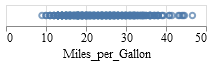

In [102]:
cars |> @vlplot(:point, x=:Miles_per_Gallon)

If we also encode the `y` channel of the mark, we start to get a useful plot:

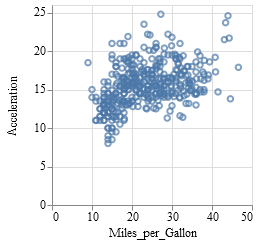

In [103]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration)

We can further split things up by coloring each point based on the content of the `Origin` column:

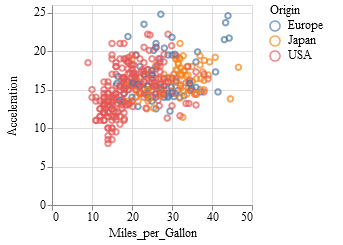

In [104]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration, color=:Origin)

We can also facet the plot so that we generate one plot per `Origin` value. We now use the `Cylinders` column for the color of the points:

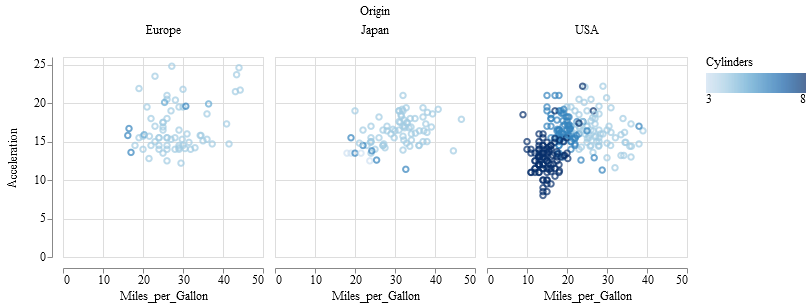

In [105]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration, column=:Origin, color=:Cylinders)

Note how Vega-Lite automatically picked a continous color scale for `Cylinders` because that column is a numeric column. If we instead want things drawn as a nominal legend, we can specify the type of the encoding with a shorthand syntax:

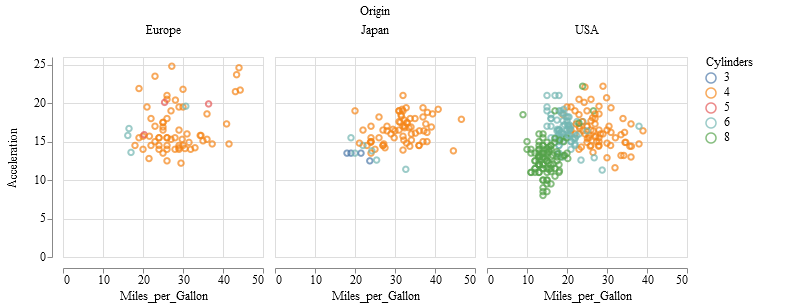

In [106]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration, column=:Origin, color="Cylinders:n")

Another type of encoding is an `ordinal` encoding:

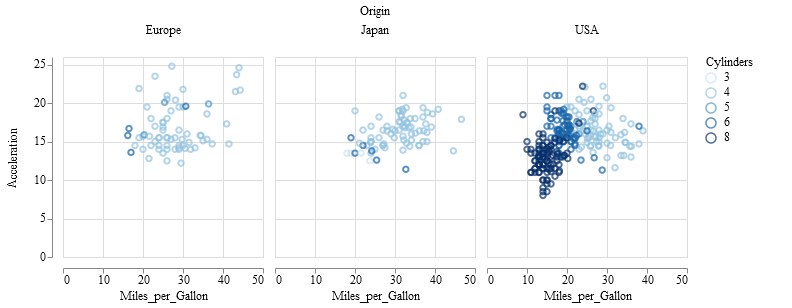

In [107]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration, column=:Origin, color="Cylinders:o")

We could also use different shapes of points for each `Origin`:

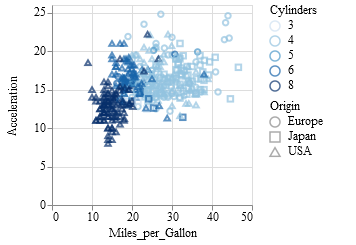

In [108]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration, shape=:Origin, color="Cylinders:o")

The plots are a little small, so lets increase the size:

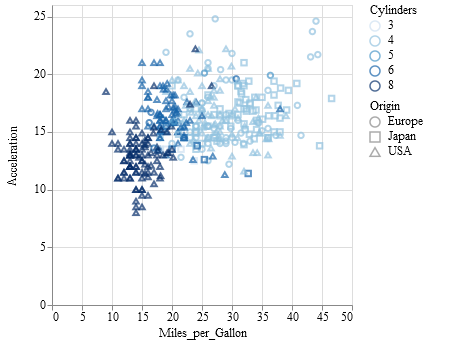

In [109]:
cars |> @vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration, shape=:Origin, color="Cylinders:o", height=300, width=300)

Another type of plot is a histogram:

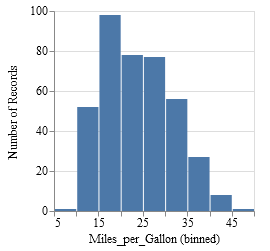

In [110]:
cars |> @vlplot(:bar, x={:Miles_per_Gallon, bin=true}, y="count()")

We can easily split this up per `Origin` with the `column` channel:

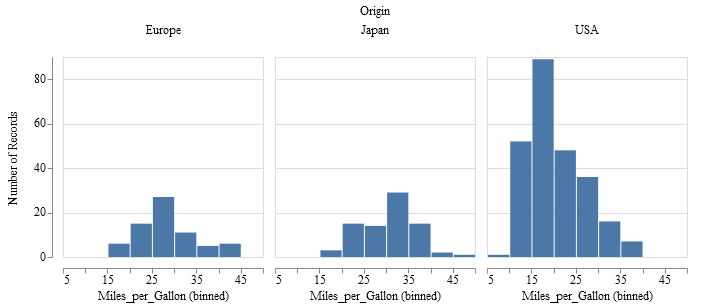

In [111]:
cars |> @vlplot(:bar, x={:Miles_per_Gallon, bin=true}, y="count()", column=:Origin)

Using Query.jl, we can manipulate all sorts of information into a table and then plot it:

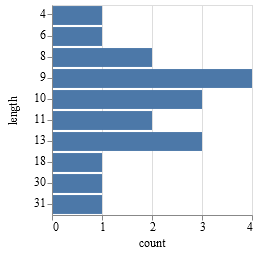

In [112]:
readdir() |> @groupby(length(_)) |> @map({length=_.key, count=length(_)}) |> @vlplot(:bar, x=:count, y="length:o")

Lets assign a plot to the variable `p`

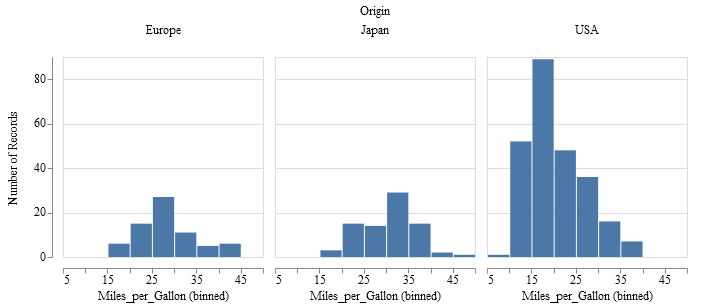

In [113]:
p = cars |> @vlplot(:bar, x={:Miles_per_Gallon, bin=true}, y="count()", column=:Origin)

And look at the type of `p`:

In [114]:
typeof(p)

VegaLite.VLSpec{:plot}

Plots can be saved in lots of different image formats:

In [115]:
p |> save("foo.png")

In [116]:
p |> save("foo.pdf")

In [117]:
p |> save("foo.svg")

In [118]:
p |> save("foo.eps")

__WARNING__: The following line only works with `master` of FileIO.jl right now. Hopefully a new version will be tagged in a few days.

We can also save a plot as a `.vegalite` file, the native Vega-Lite JSON format:

In [119]:
p |> save("foo.vegalite")

Voyager uses Vega-Lite under the hood, so the two packages are tightly integrated. Lets pipe the `cars` dataset into Voyager again and create a plot in Voyager:

In [120]:
v = cars |> Voyager

DataVoyager.Voyager(Electron.Window(Electron.Application(0x0000000000000001, Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x000000000000045c) open, 0 bytes waiting), Process(`'C:\Users\david\.julia\v0.6\Electron\src\..\deps\electron\electron.exe' 'C:\Users\david\.julia\v0.6\Electron\src\main.js' juliaelectron-17048-1 juliaelectron-sysnotify-17048-1`, ProcessRunning), Base.PipeEndpoint(Base.Libc.WindowsRawSocket(Ptr{Void} @0x0000000000000464) active, 0 bytes waiting), true), 4, true))

![alt](screenshots/voyager3.png)

We can now access the current plot in the Voyager window with the `[]` syntax:

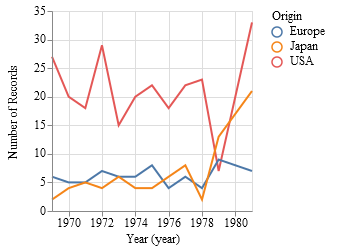

In [121]:
v[]

Note that this just returns a plot instance, as if we had created it with the `@vlplot` macro:

In [122]:
typeof(v[])

VegaLite.VLSpec{:plot}

We can therefore save it as files:

In [123]:
v[] |> save("foo2.pdf")

__WARNING__: The following cells only works with the `master` branch of FileIO.jl.

Here we can save the plot as a Vega-Lite file.

In [126]:
v[] |> save("foo.vegalite")

We can then later load that file again, which returns a standard plot instance, as if we had created it with the `@vlplot` macro:

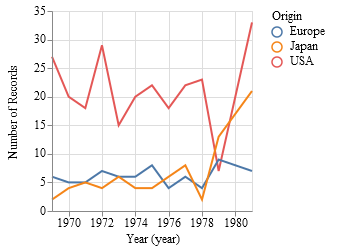

In [127]:
load("foo.vegalite")

We can use this for interesting manipulations. For example, we can load a saved plot, but then pipe different data into it to create an updated plot:

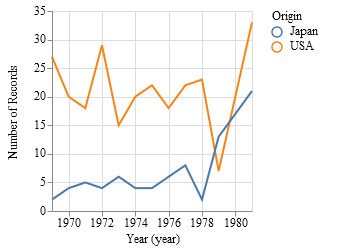

In [128]:
cars |>
    @filter(_.Origin in ("USA", "Japan")) |>
    load("foo.vegalite")

## Missing values

The Queryverse uses [DataValues.jl](https://github.com/davidanthoff/DataValues.jl) for its missing value representation.

## Conclusion

![alt](slides/Slide32.PNG)

![alt](slides/Slide33.PNG)